# Chapter 8 Exercises

Q1. What are the main motivations for reducing a dataset’s dimensionality? What are
the main drawbacks?

The main motivations for reducing a dataset's dimensionality are:
- Time required to train will get reduced since the dimensions are lesser. This is the main use case for which dimensions are reduced
- If the number of dimensions are brought down to 2 or 3, we can also visualize the data. This can be very useful in understanding inherent patterns in data
- This can be used for compressing the data as space requirement will be lesser for lower dimensional data.

The drawbacks of reducing the dimensionality are:
- Some information is lost in this process
- If there is very little correlation between different features, we will not be able to reduce the number of dimensions significantly

Q2. What is the curse of dimensionality?

As the number of dimensions increase, the distance between any 2 points becomes much larger than what we see in lower dimenstions. This implies that the training set will be sparse with lots of gaps. The reliability of prediction also decreases because of larger gaps.

Q3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the
operation? If so, how? If not, why?

Yes, it is possible to reverse the operation by inversing the transformation for algorithms such as PCA. We will get an approximation of the original dataset. In Scikit learn, we can use

approximation = pca.inverse_transform(lower_dimensional_data)
  where, pca is an instance of PCA.
  
We may not be able to inverse if the algorithm that is used for dimensionality reduction does not provide an inverse funcion.

Q4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

Yes, we can use Kernel PCA to reduce the dimensionality of a highly nonliner dataset

Q5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained
variance ratio to 95%. How many dimensions will the resulting dataset have?

The dimensions that the resulting dataset will have will depend on the original dataset. If the dataset had high correlation between different features, then resulting dataset will have fewer features.

Q6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA,
or Kernel PCA?

Vanilla PCA - This can be used as the baseline. It requires that the training data can be loaded on the system.

Incremental PCA - This does not require the whole training set to run the SVD algorithm. It can be used when training set is very large or PCA needs to be run online

Randomized PCA - This is a stochastic algorithm which tries to find an approximation quickly. It runs very fast when the reduced number of features is much smaller than the original number of features. So, when we expect such a scenario, say when the number of features is large and lot of them do not add any variance (information), we can use this

Kernel PCA - This can be used in the case of highly non linear datasets.

Q7. How can you evaluate the performance of a dimensionality reduction algorithm
on your dataset?

To evaluate the performance of a dimensionality reduction algorithm, we can
- evaluate the performance of the pipeline, of which the above step is a part
- apply inverse transformation and check how close we get to the original dataset

Q8. Does it make any sense to chain two different dimensionality reduction algo‐
rithms?

It may make sense to chain different dimensionality reduction algorithms. We may use a faster running algorithm first and then a more accurate one which takes longer. The second algorithm will require much lesser time in such a scenario.

Q9. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set
and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing). Train a Random Forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set. Next, use PCA to
reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
Train a new Random Forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next evaluate the classifier on the test set: how
does it compare to the previous classifier?

In [23]:
from sklearn.datasets import fetch_openml
import numpy as np

In [24]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [25]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [26]:
mnist.target = mnist.target.astype(np.int8)
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [27]:
mnist.data.shape

(70000, 784)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7, random_state=42)

In [29]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from time import time

In [31]:
clf_forest = RandomForestClassifier(n_estimators=200)

t0=time()
clf_forest.fit(X_train, y_train)
print("training time:", round(time()-t0, 3), "s")

training time: 110.519 s


In [32]:
y_predtest = clf_forest.predict(X_test)
y_predtest

array([8, 4, 8, ..., 3, 8, 3], dtype=int8)

In [33]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_predtest)
print(score)

0.9669


In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(.95)
X_reduced = pca.fit_transform(X_train)

In [36]:
print(pca.components_)

[[ 3.69499937e-19  5.55111512e-17  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.22774538e-20 -3.81639165e-17  9.71445147e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 5.55530438e-19  0.00000000e+00  5.55111512e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.45492811e-18  3.19189120e-16 -1.05124243e-15 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 2.36761074e-18 -6.97358837e-16 -1.23165367e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.10681867e-18 -4.16333634e-17 -2.60208521e-16 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [37]:
print(pca.explained_variance_ratio_)

[0.09736019 0.07162769 0.06157279 0.05407583 0.04894241 0.04314663
 0.0326955  0.02886339 0.02755206 0.02336354 0.02114186 0.02036159
 0.01710273 0.01697588 0.01579852 0.01483028 0.01315072 0.01277798
 0.01188548 0.01154643 0.01069553 0.01010967 0.00954102 0.00907833
 0.00882614 0.00838996 0.00809334 0.00785285 0.00740609 0.00689452
 0.00657504 0.00644894 0.00601529 0.00586087 0.00568734 0.00542785
 0.00505607 0.00487531 0.00479006 0.00466511 0.00454422 0.00445376
 0.00419137 0.00396211 0.00384115 0.00375532 0.00361444 0.00350354
 0.00338201 0.00319514 0.00316586 0.00309288 0.00295258 0.00287322
 0.00282207 0.00269456 0.00267291 0.00256465 0.00253613 0.00243878
 0.00239702 0.00238198 0.00229797 0.00221263 0.00212635 0.00205955
 0.00202272 0.00194566 0.00191948 0.00188817 0.00187128 0.00180041
 0.00176297 0.00172727 0.0016457  0.00163152 0.00161329 0.00154714
 0.00146981 0.00142148 0.00140753 0.00140013 0.00139289 0.00134773
 0.00132497 0.00132163 0.00129195 0.00125007 0.00122785 0.0012

In [38]:
X_reduced.shape

(60000, 154)

In [39]:
clf_rf = RandomForestClassifier(n_estimators=200)

t0=time()
clf_rf.fit(X_reduced, y_train)
print("training time:", round(time()-t0, 3), "s")

training time: 245.284 s


Surprisingly, the training time has increased after applying PCA. Could it be because of different load levels on the machine while running these 2 different classifiers

In [40]:
X_testreduced = pca.transform(X_test)

In [41]:
X_testreduced.shape

(10000, 154)

In [42]:
y_pred = clf_rf.predict(X_testreduced)
y_pred

array([8, 4, 8, ..., 3, 8, 3], dtype=int8)

In [43]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9485


Accuracy of prediction is slightly lesser when PCA transformed dataset is used

Q10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. You can use a scatterplot using 10 different colors to rep‐
resent each image’s target class. Alternatively, you can write colored digits at the
location of each instance, or even plot scaled-down versions of the digit images
themselves (if you plot all digits, the visualization will be too cluttered, so you
should either draw a random sample or plot an instance only if no other instance
has already been plotted at a close distance). You should get a nice visualization
with well-separated clusters of digits. Try using other dimensionality reduction
algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [9]:
from sklearn.manifold import TSNE

Running TSNE for the whole set was taking too long. So, selecting 25% of the data.

In [12]:
random_indices = np.random.choice(X_train.shape[0], size=15000, replace=False)
X_subset = X_train[random_indices,:]
X_subset.shape

(15000, 784)

In [13]:
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_subset)
X_embedded.shape

(15000, 2)

In [14]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
y_subset= y_train[random_indices]

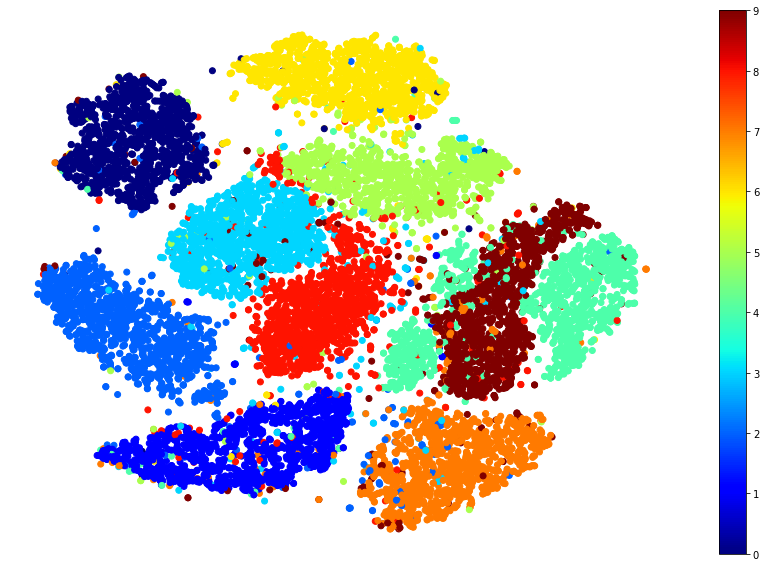

In [19]:
plt.figure(figsize=(15,10))
plt.scatter(x=X_embedded[:,0], y=X_embedded[:,1], c=y_subset, cmap='jet')
plt.axis('off')
plt.colorbar()

In [20]:
pca_d = PCA(n_components=2)
X_pca = pca_d.fit_transform(X_subset)

In [21]:
print(pca_d.explained_variance_ratio_)

[0.09650947 0.07172348]


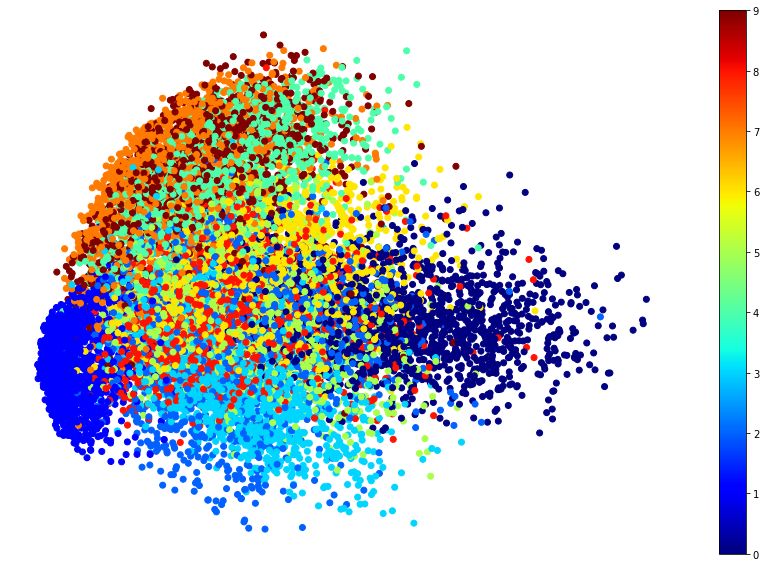

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=y_subset, cmap='jet')
plt.axis('off')
plt.colorbar()

This was extremely fast as compared to TSNE but the results are not as clearly separated as in the case of TSNE